# Heart Disease Prediction ❤️

---

## 🩺 Framingham Heart Study: Dataset Introduction & Overview

### 📌 Introduction
The **Framingham Heart Study** is a world-renowned, long-term cardiovascular cohort study. This dataset is commonly used in Machine Learning to predict the 10-year risk of **Coronary Heart Disease (CHD)** based on a variety of risk factors.

The objective is to build a classification model to predict whether a patient has a high risk of heart disease (10-year CHD) given their medical and demographic profile.

---

### 📊 Feature Descriptions

The dataset consists of **4,238 records** and **15 variables** (features) plus the target variable.

#### 👥 Demographic Information
* `male`: Patient gender (1 = Male, 0 = Female).
* `age`: Age of the patient at the time of examination.
* `education`: Level of education (Categorical: 1, 2, 3, or 4).

#### 🚬 Behavioral Factors
* `currentSmoker`: Whether the patient is a current smoker (1 = Yes, 0 = No).
* `cigsPerDay`: Average number of cigarettes smoked per day.

#### 🏥 Medical History
* `BPMeds`: Whether the patient was on blood pressure medication (1 = Yes, 0 = No).
* `prevalentStroke`: Whether the patient had previously had a stroke (1 = Yes, 0 = No).
* `prevalentHyp`: Whether the patient was hypertensive (1 = Yes, 0 = No).
* `diabetes`: Whether the patient had diabetes (1 = Yes, 0 = No).

#### 🧪 Physical Examination Results
* `totChol`: Total cholesterol level.
* `sysBP`: Systolic blood pressure.
* `diaBP`: Diastolic blood pressure.
* `BMI`: Body Mass Index ($weight / height^2$).
* `heartRate`: Heart rate (beats per minute).
* `glucose`: Blood glucose level.

#### 🎯 Target Variable
* **`TenYearCHD`**: 10-year risk of coronary heart disease (Binary: 1 = "Yes", 0 = "No").

---

### 🛠️ Preliminary Data Observations
1. **Missing Values**: Features like `glucose`, `education`, and `BPMeds` contain null values that require imputation.
2. **Imbalanced Classes**: Usually, the number of "No CHD" cases significantly outweighs "CHD" cases, which may require techniques like oversampling (SMOTE) or adjusted evaluation metrics.
3. **Multicollinearity**: Variables like `sysBP` and `diaBP` are likely highly correlated.

## Import Libraries

In [54]:
# 📊 Data Analysis Libraries
import numpy as np
import pandas as pd

# 📉 Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# 🤖 Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, SplineTransformer, RobustScaler, Normalizer, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report, roc_curve, auc

## Load the Dataset

In [55]:
df = pd.read_csv(r'C:\Users\TUF A16\OneDrive\Desktop\AI Projects\Heart disease prediction\Dataset\framingham.csv')

## Data Exploration & Preprocessing

### A. Data Overview

In [56]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [58]:
# Separate numerical and Categorical columns
# Define numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define Categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print columns name and their data types
print(f'Numerical columns   => {len(numerical_cols)} => {numerical_cols}')
print(f'Categorical columns => {len(categorical_cols)} => {categorical_cols}')

Numerical columns   => 16 => ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
Categorical columns => 0 => []


### B. Take copy of our dataset

In [59]:
df_clean =  df.copy()

### C. Check missing values

In [60]:
df_clean.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Show the missing values in graph shape using `seaborn`

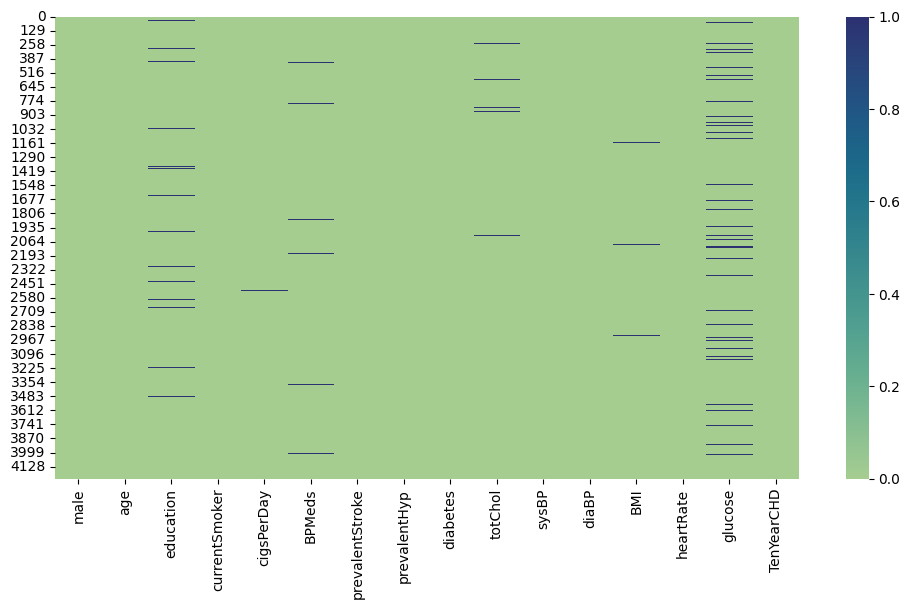

In [61]:
# Define Fig size
plt.figure(figsize=(12, 6))

plot_miss = sns.heatmap(df_clean.isnull(), cmap='crest')

plt.show()

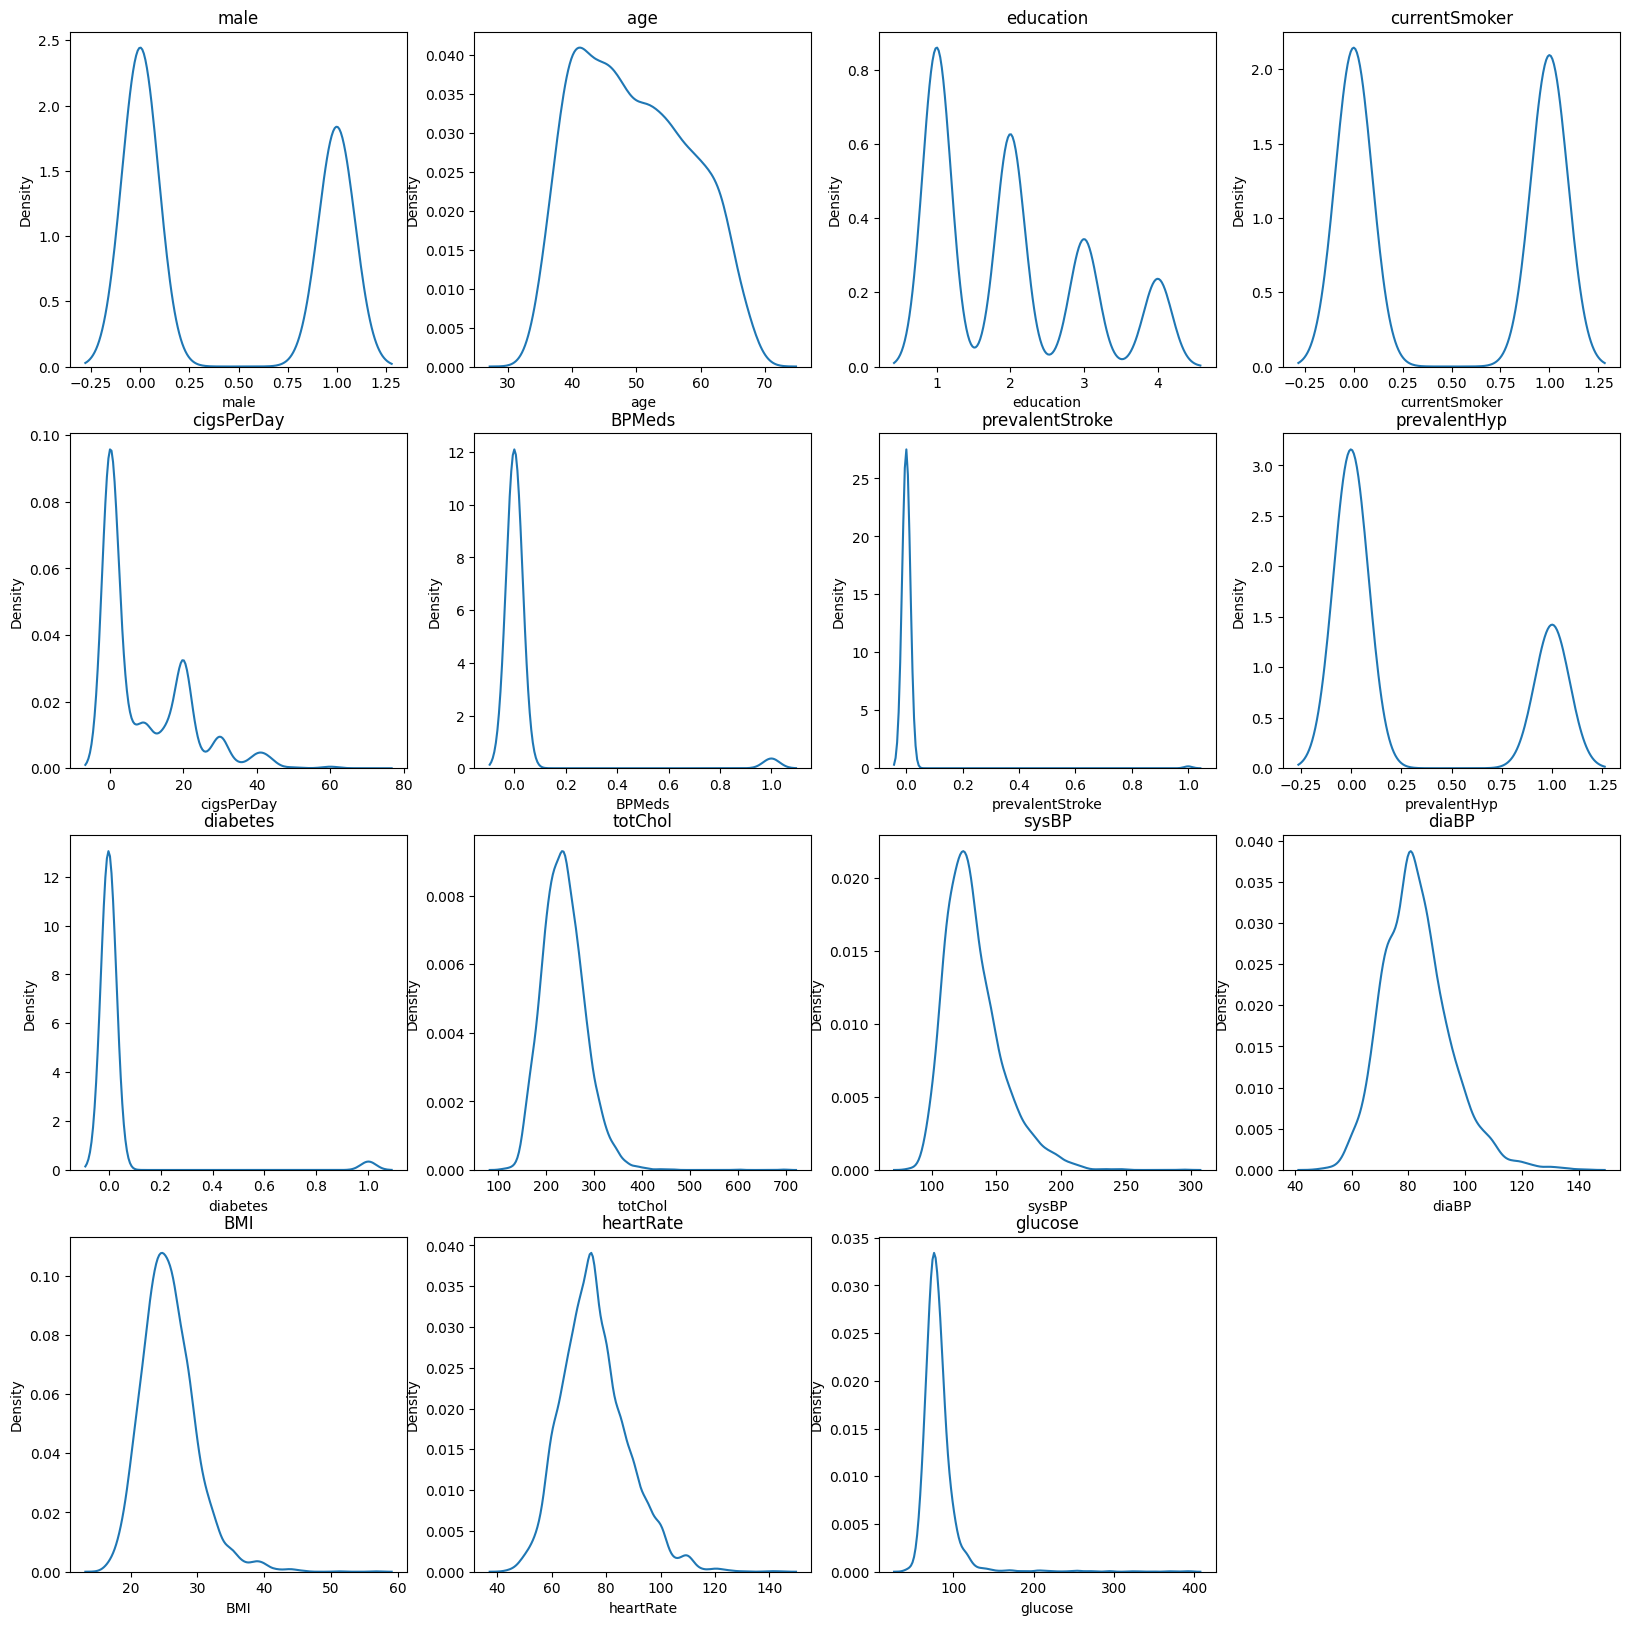

In [62]:
plt.figure(figsize=(20, 20))

for i in range(len(df_clean.columns) - 1):
    
    plt.subplot(4, 4, i+1)
    sns.kdeplot(df_clean.iloc[:, i])
    plt.title(f'{df_clean.columns[i]}')

plt.show()

#### Will imputation the missing values

In [ ]:
print(numerical_cols)

: 

: 

: 

: 

: 

In [63]:
# 1. Skewed Data (majority) -> We use Median with them
skewed_features = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']
 
# 2. Category columns -> We will use Mode with them
category_features = ['education', 'BPMeds']

# Median compensation
for col in skewed_features:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Mode compensation
for col in category_features:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# Make sure there are no nulls
print(f'Missing values after imputation: \n{df_clean.isnull().sum()}')

Missing values after imputation: 
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


### D. Check duplicates values

In [64]:
df_clean.duplicated().sum()

np.int64(0)

### E. Check outliers

In [65]:
cols_exclude = ['diabetes', 'prevalentHyp', 'prevalentStroke', 'BPMeds', 'currentSmoker', 'education', 'male', 'TenYearCHD']

features_to_clean = [col for col in numerical_cols if col not in cols_exclude]
print(features_to_clean)

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [66]:
def outlier_detection(df, features, mode='none'):
    """
    mode options:
    - 'none': Just print stats (default).
    - 'remove': Drop rows with outliers.
    - 'cap': Replace outliers with lower/upper bounds.
    """
    
    df_processed = df.copy()
    total_outlier_values_count = 0
    rows_with_outliers = set()

    print(f'Starting Outlier Detection (Mode: {mode})...\n')

    for col in features:
        # 1. Calculating IQR Bounds
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 2. Discovering Outliers (for statistics only)
        current_outliers = df_processed[(df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)]
        num_outliers = len(current_outliers)

        if num_outliers > 0:
            percentage = (num_outliers / len(df_processed)) * 100
            print(f'Column: {col} | Outliers: {num_outliers} | {percentage:.2f}%')
            print(f'   -> Bounds: ({lower_bound:.2f}, {upper_bound:.2f})') # Useful to know what values ​​have changed

            total_outlier_values_count += num_outliers
            rows_with_outliers.update(current_outliers.index)

            # 3. Applying Capping (if the mode is cap)
            if mode == 'cap':
                # Any value less than lower will be lower, and any value greater than upper will be upper
                df_processed[col] = df_processed[col].clip(lower=lower_bound, upper=upper_bound)
    
    # Final Summary
    print('\n======= Final Summary =======')
    print(f'Total outlier values found: {total_outlier_values_count}')
    print(f'Unique rows affected: {len(rows_with_outliers)}')
    print(f'Rows percentage: {(len(rows_with_outliers)/len(df))*100:.2f}%')

    # 4. Apply the delete (if the mod is remove)
    if mode == 'remove':
        print('-> Removing rows with outliers...')
        df_processed = df_processed.drop(index=rows_with_outliers)
    elif mode == 'cap':
        print('-> Outliers have been capped to upper/lower bounds.')
    
    return df_processed




outlier_detection(df_clean, features_to_clean)

Starting Outlier Detection (Mode: none)...

Column: cigsPerDay | Outliers: 12 | 0.28%
   -> Bounds: (-30.00, 50.00)
Column: totChol | Outliers: 57 | 1.34%
   -> Bounds: (122.00, 346.00)
Column: sysBP | Outliers: 126 | 2.97%
   -> Bounds: (76.50, 184.50)
Column: diaBP | Outliers: 81 | 1.91%
   -> Bounds: (52.69, 112.19)
Column: BMI | Outliers: 97 | 2.29%
   -> Bounds: (15.64, 35.47)
Column: heartRate | Outliers: 76 | 1.79%
   -> Bounds: (45.50, 105.50)
Column: glucose | Outliers: 262 | 6.18%
   -> Bounds: (52.50, 104.50)

======= Final Summary =======
Total outlier values found: 711
Unique rows affected: 585
Rows percentage: 13.80%


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0


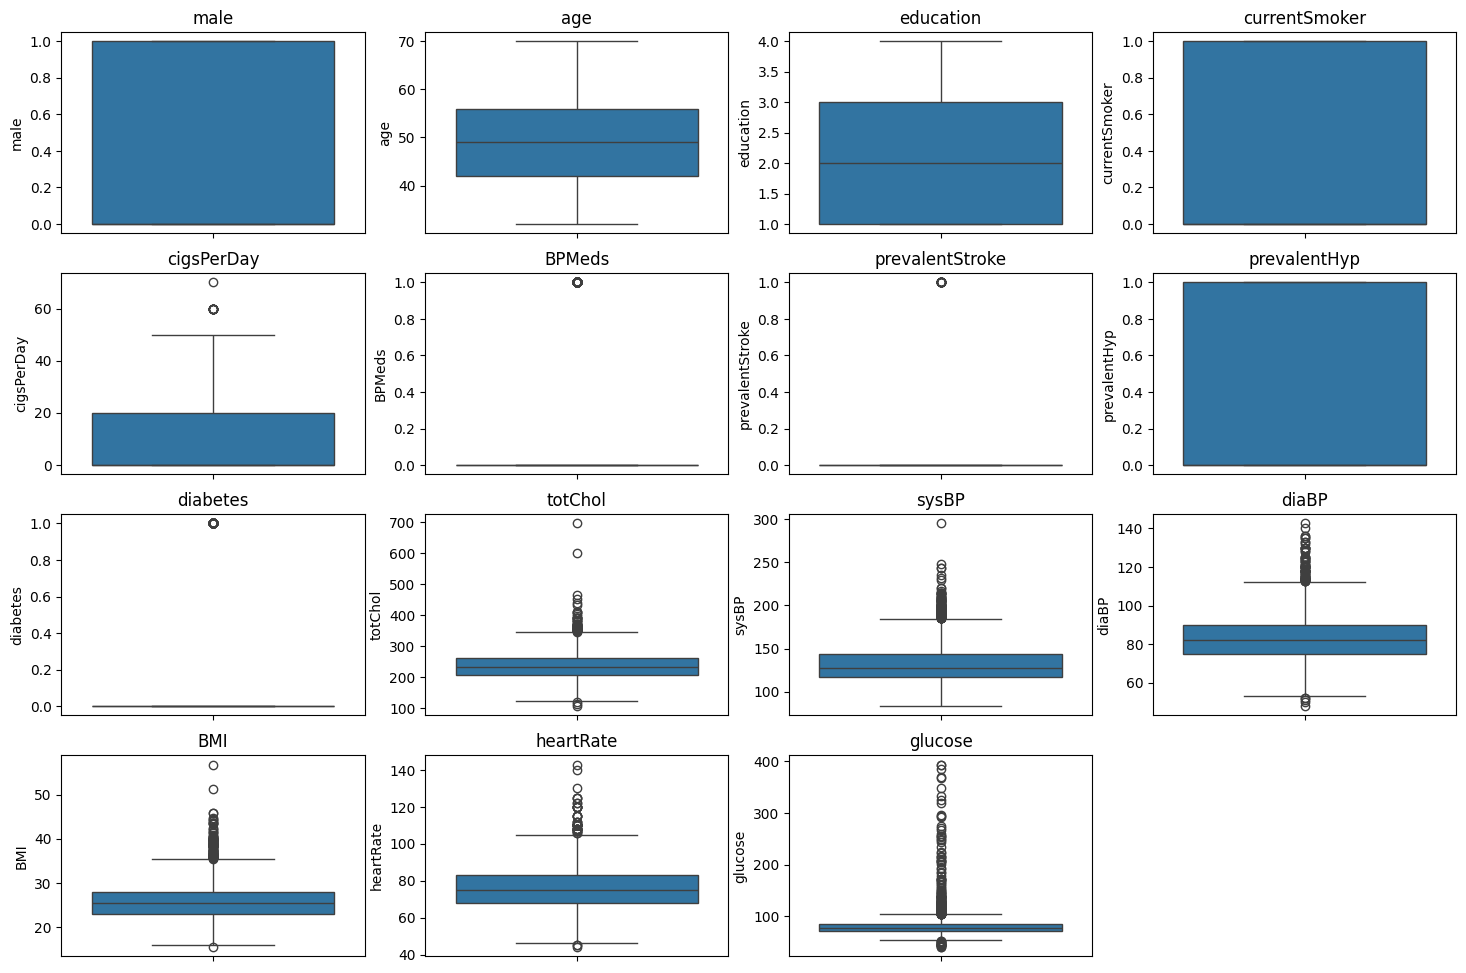

In [67]:
plt.figure(figsize=(18, 12))

for i in range(len(df_clean.columns) - 1):
    
    plt.subplot(4, 4, i+1)
    sns.boxplot(df_clean.iloc[:, i])
    plt.title(f'{df_clean.columns[i]}')

plt.show()

#### Make capping to outliers

In [69]:
df_clean = outlier_detection(df_clean, features_to_clean, mode='cap')

Starting Outlier Detection (Mode: cap)...

Column: cigsPerDay | Outliers: 12 | 0.28%
   -> Bounds: (-30.00, 50.00)
Column: totChol | Outliers: 57 | 1.34%
   -> Bounds: (122.00, 346.00)
Column: sysBP | Outliers: 126 | 2.97%
   -> Bounds: (76.50, 184.50)
Column: diaBP | Outliers: 81 | 1.91%
   -> Bounds: (52.69, 112.19)
Column: BMI | Outliers: 97 | 2.29%
   -> Bounds: (15.64, 35.47)
Column: heartRate | Outliers: 76 | 1.79%
   -> Bounds: (45.50, 105.50)
Column: glucose | Outliers: 262 | 6.18%
   -> Bounds: (52.50, 104.50)

======= Final Summary =======
Total outlier values found: 711
Unique rows affected: 585
Rows percentage: 13.80%
-> Outliers have been capped to upper/lower bounds.


### F. Describe of dataset  

In [70]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00000,0.00,0.0,1.0000,1.00000
age,4238.0,49.584946,8.572160,32.00000,42.00,49.0,56.0000,70.00000
education,4238.0,1.954696,1.018510,1.00000,1.00,2.0,3.0000,4.00000
currentSmoker,4238.0,0.494101,0.500024,0.00000,0.00,0.0,1.0000,1.00000
cigsPerDay,4238.0,8.910807,11.781028,0.00000,0.00,0.0,20.0000,50.00000
BPMeds,4238.0,0.029259,0.168552,0.00000,0.00,0.0,0.0000,1.00000
prevalentStroke,4238.0,0.005899,0.076587,0.00000,0.00,0.0,0.0000,1.00000
prevalentHyp,4238.0,0.310524,0.462763,0.00000,0.00,0.0,1.0000,1.00000
diabetes,4238.0,0.025720,0.158316,0.00000,0.00,0.0,0.0000,1.00000
totChol,4238.0,236.191600,42.297346,122.00000,206.00,234.0,262.0000,346.00000


## Exploratory Data Analysis (EDA)

### Univariate Analysis and Bivariate Analysis

#### `male`

Patient gender (1 = Male, 0 = Female).

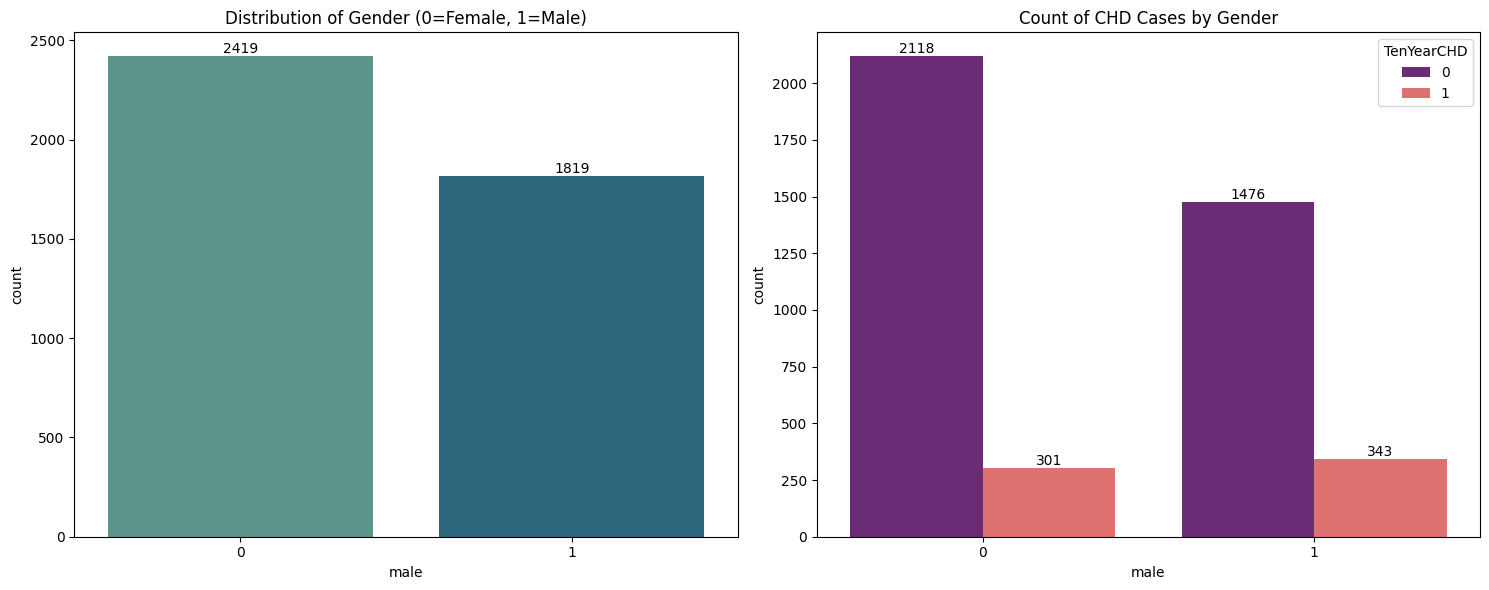

In [71]:
plt.figure(figsize=(15, 6))

# First diagram: Gender distribution (Counts of Male vs Female)
ax1 = plt.subplot(1, 2, 1)
# We used hue='male' to avoid the warning, and legend=False because we don't need a key here
sns.countplot(data=df_clean, x='male', hue='male', palette='crest', legend=False)
plt.title('Distribution of Gender (0=Female, 1=Male)')

for container in ax1.containers:
    ax1.bar_label(container)

# Second diagram: Comparing disease incidence by type
ax2 = plt.subplot(1, 2, 2)
sns.countplot(data=df_clean, x='male', hue='TenYearCHD', palette='magma')
plt.title('Count of CHD Cases by Gender')

for container in ax2.containers:
    ax2.bar_label(container)

plt.tight_layout()
plt.show()

##### 🔍 Insight:
* **Gender Risk:** Data shows that **males (1)** have a higher prevalence of Ten-Year CHD compared to females.
* **Observation:** While the dataset might have more female records, the proportion of positive CHD cases is higher in men, suggesting gender is a significant biological risk factor.

---

#### `age`

Age of the patient at the time of examination.

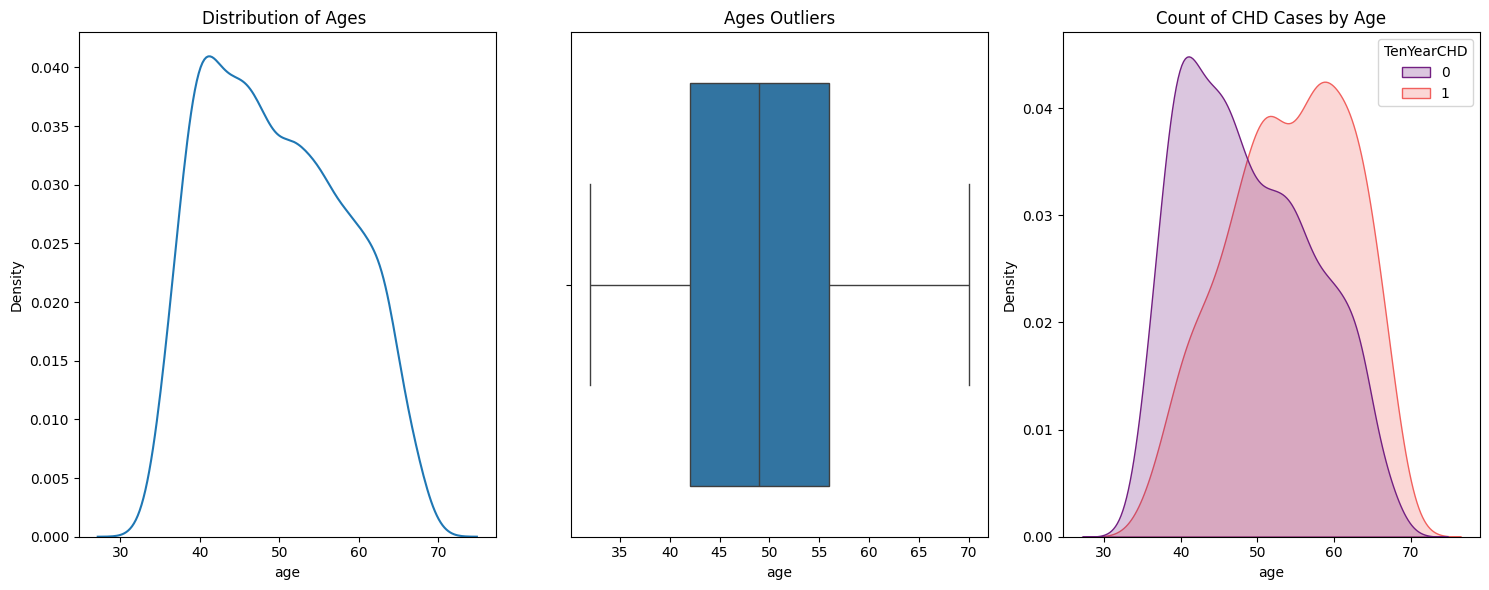

In [72]:
plt.figure(figsize=(15, 6))

# First diagram: Gender distribution (Counts of Male vs Female)
ax1 = plt.subplot(1, 3, 1)
# We used hue='age' to avoid the warning, and legend=False because we don't need a key here
sns.kdeplot(data=df_clean, x='age')
plt.title('Distribution of Ages ')

# Second diagram: Comparing disease incidence by type
ax2 = plt.subplot(1, 3, 2)
sns.boxplot(data=df_clean, x='age')
plt.title('Ages Outliers')

# Third diagram: Comparing disease incidence by type
ax3 = plt.subplot(1, 3, 3)
sns.kdeplot(data=df_clean, x='age', hue='TenYearCHD', fill=True, palette='magma', common_norm=False)
plt.title('Count of CHD Cases by Age')

plt.tight_layout()
plt.show()

##### 🔍 Insight:
* **Age Progression:** There is a clear upward trend; as **age increases**, the probability of being in the "Positive CHD" group increases significantly.
* **Critical Range:** Most CHD cases are concentrated in the **50-70** age bracket. Patients under 40 show very low risk.

---

#### `education`

Level of education (Categorical: 1, 2, 3, or 4).

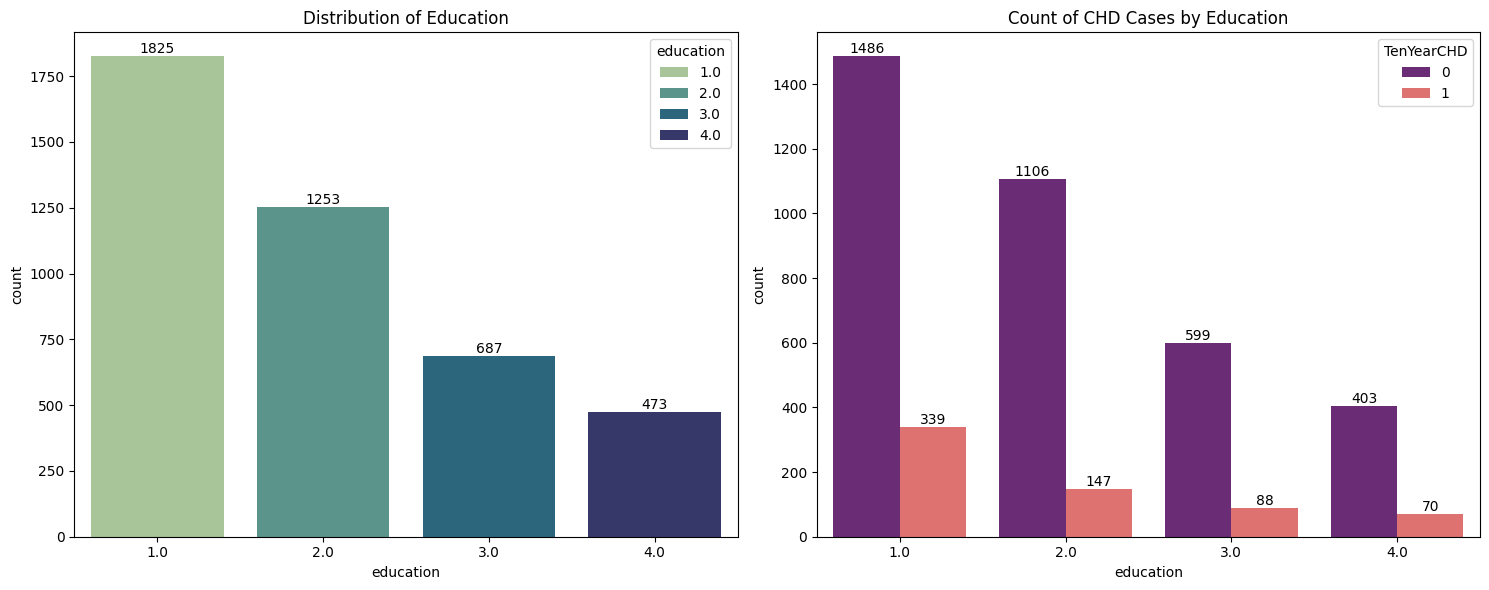

In [73]:
plt.figure(figsize=(15, 6))

# First diagram: Education distribution
ax1 = plt.subplot(1, 2, 1)
# We used hue='education' to avoid the warning, and legend=False because we don't need a key here
sns.countplot(data=df_clean, x='education', hue='education', palette='crest')
plt.title('Distribution of Education')

for container in ax1.containers:
    ax1.bar_label(container)

# Second diagram: Comparing disease incidence by education
ax2 = plt.subplot(1, 2, 2)
sns.countplot(data=df_clean, x='education', hue='TenYearCHD', palette='magma')
plt.title('Count of CHD Cases by Education')

for container in ax2.containers:
    ax2.bar_label(container)

plt.tight_layout()
plt.show()

##### 🔍 Insight:
* **Socioeconomic Proxy:** While CHD affects all education levels, there is a slight trend showing that higher education levels (3 and 4) correlate with fewer heart disease cases, potentially due to better health awareness or access to healthcare.

---

#### `currentSmoker`

Whether the patient is a current smoker (1 = Yes, 0 = No).

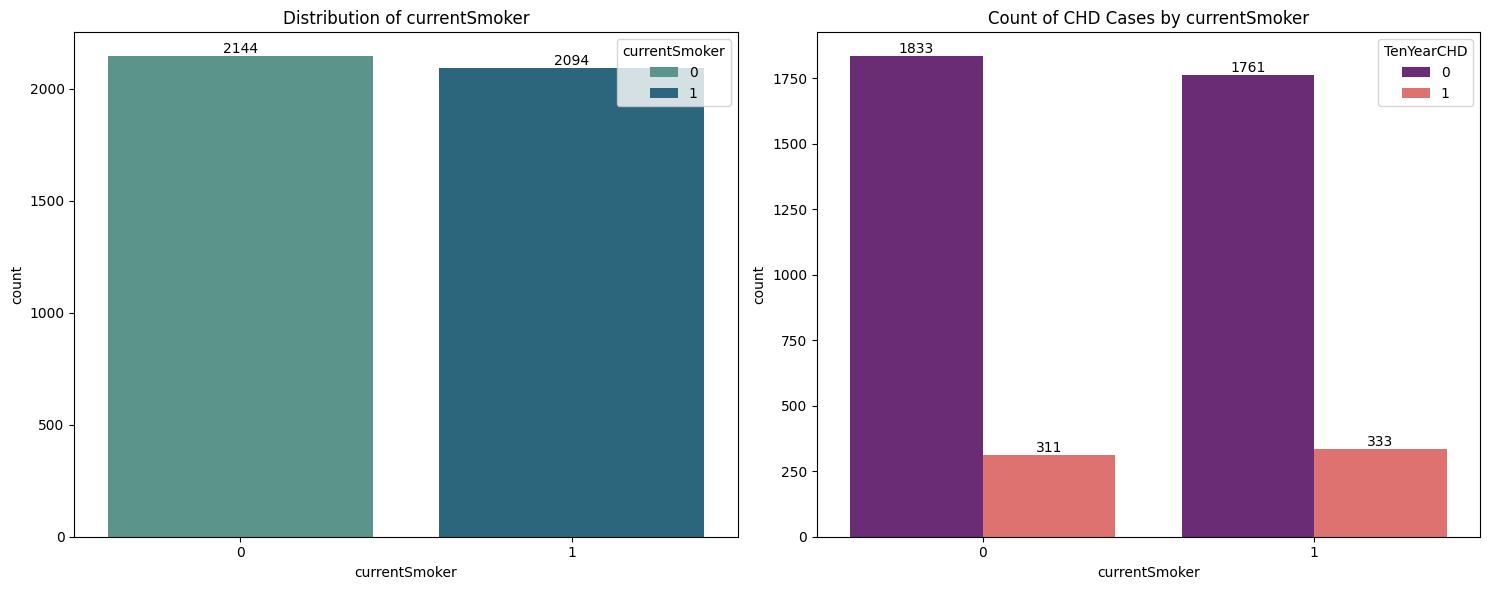

In [74]:
plt.figure(figsize=(15, 6))

# First diagram: Current smoker distribution
ax1 = plt.subplot(1, 2, 1)
# We used hue='currentSmoker' to avoid the warning, and legend=False because we don't need a key here
sns.countplot(data=df_clean, x='currentSmoker', hue='currentSmoker', palette='crest')
plt.title('Distribution of currentSmoker')

for container in ax1.containers:
    ax1.bar_label(container)

# Second diagram: Comparing disease incidence by current Smoker
ax2 = plt.subplot(1, 2, 2)
sns.countplot(data=df_clean, x='currentSmoker', hue='TenYearCHD', palette='magma')
plt.title('Count of CHD Cases by currentSmoker')

for container in ax2.containers:
    ax2.bar_label(container)

plt.tight_layout()
plt.show()

#### `cigsPerDay`

Average number of cigarettes smoked per day.

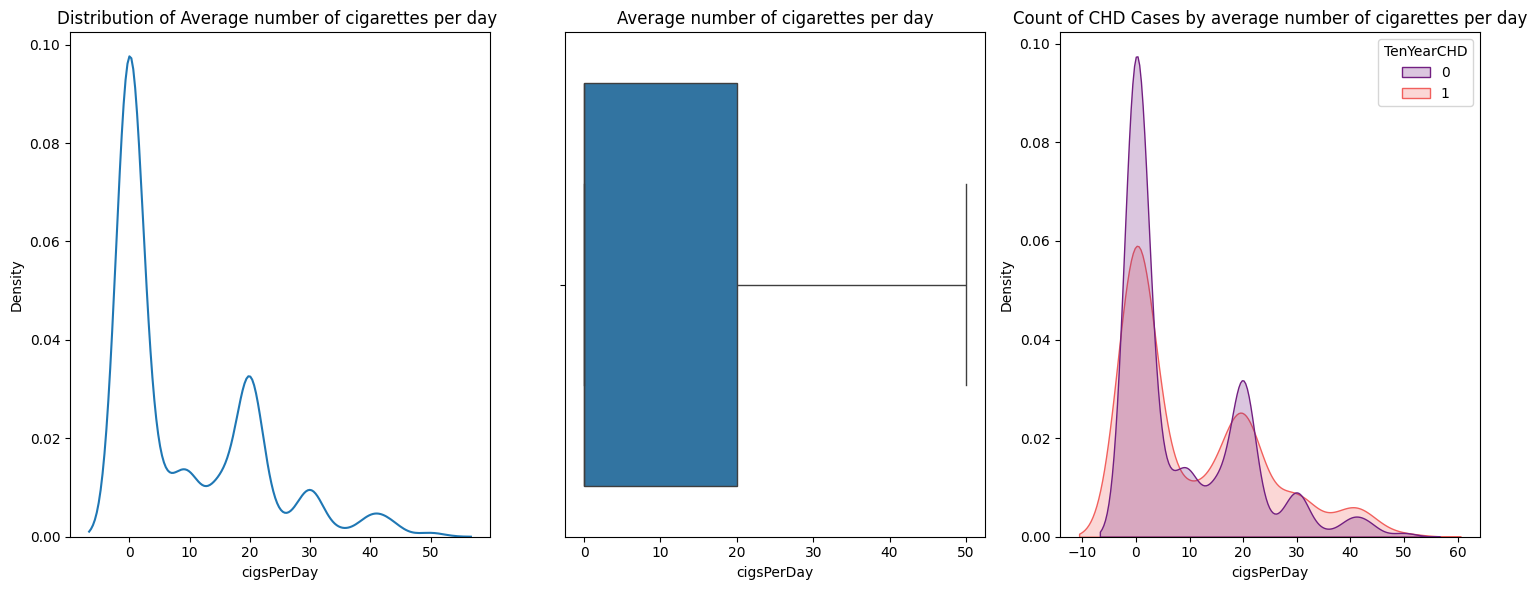

In [75]:
plt.figure(figsize=(15, 6))

# First diagram: Gender distribution (Counts of Male vs Female)
ax1 = plt.subplot(1, 3, 1)
# We used hue='age' to avoid the warning, and legend=False because we don't need a key here
sns.kdeplot(data=df_clean, x='cigsPerDay')
plt.title('Distribution of Average number of cigarettes per day ')

# Second diagram: Comparing disease incidence by type
ax2 = plt.subplot(1, 3, 2)
sns.boxplot(data=df_clean, x='cigsPerDay')
plt.title('Average number of cigarettes per day')

# Third diagram: Comparing disease incidence by type
ax3 = plt.subplot(1, 3, 3)
sns.kdeplot(data=df_clean, x='cigsPerDay', hue='TenYearCHD', fill=True, palette='magma', common_norm=False)
plt.title('Count of CHD Cases by average number of cigarettes per day')

plt.tight_layout()
plt.show()

##### 🔍 Insight:
* **Intensity Matters:** Being a `currentSmoker` is a general risk, but the **number of cigarettes per day** shows that "Heavy Smokers" have a much higher density of CHD cases.
* **Risk Threshold:** Even a low number of cigarettes increases risk, but the danger peaks as the count crosses 20 cigarettes/day.

---

#### `BPMeds`

Whether the patient was on blood pressure medication (1 = Yes, 0 = No).

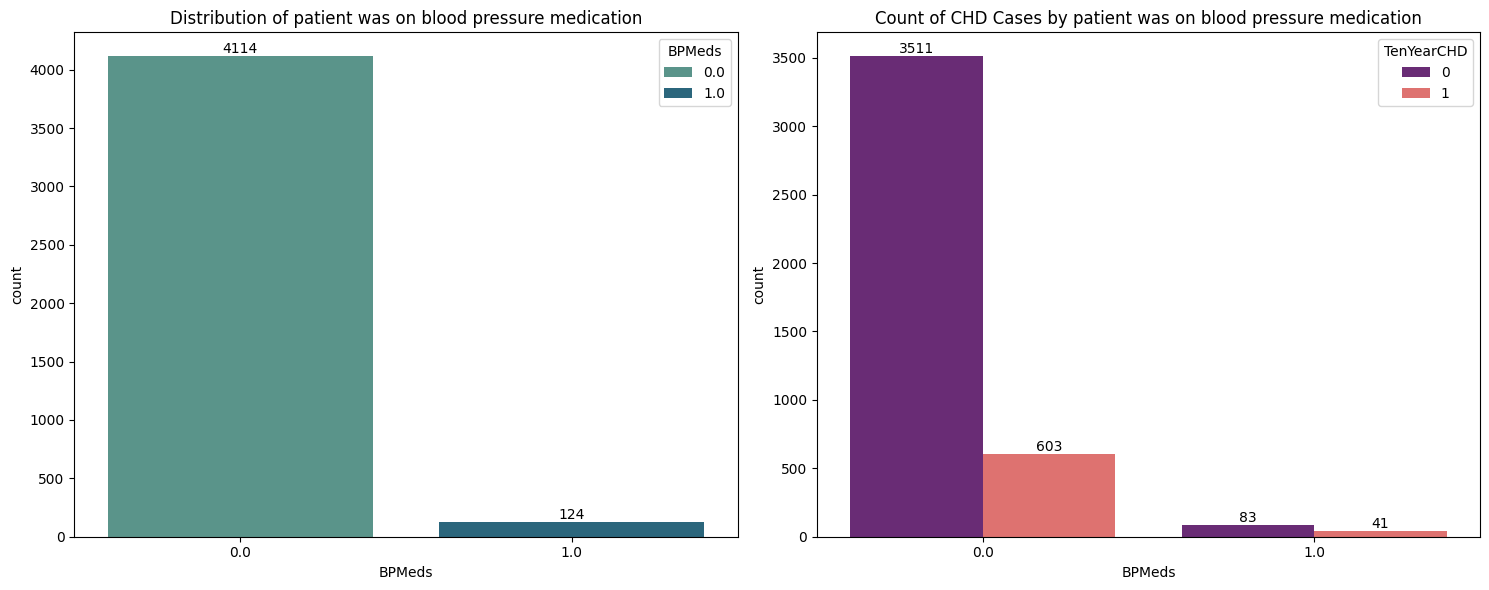

In [76]:
plt.figure(figsize=(15, 6))

# First diagram: Current smoker distribution
ax1 = plt.subplot(1, 2, 1)
# We used hue='BPMeds' to avoid the warning, and legend=False because we don't need a key here
sns.countplot(data=df_clean, x='BPMeds', hue='BPMeds', palette='crest')
plt.title('Distribution of patient was on blood pressure medication')

for container in ax1.containers:
    ax1.bar_label(container)

# Second diagram: Comparing disease incidence by current Smoker
ax2 = plt.subplot(1, 2, 2)
sns.countplot(data=df_clean, x='BPMeds', hue='TenYearCHD', palette='magma')
plt.title('Count of CHD Cases by patient was on blood pressure medication')

for container in ax2.containers:
    ax2.bar_label(container)

plt.tight_layout()
plt.show()

#### `prevalentStroke`

Whether the patient had previously had a stroke (1 = Yes, 0 = No).

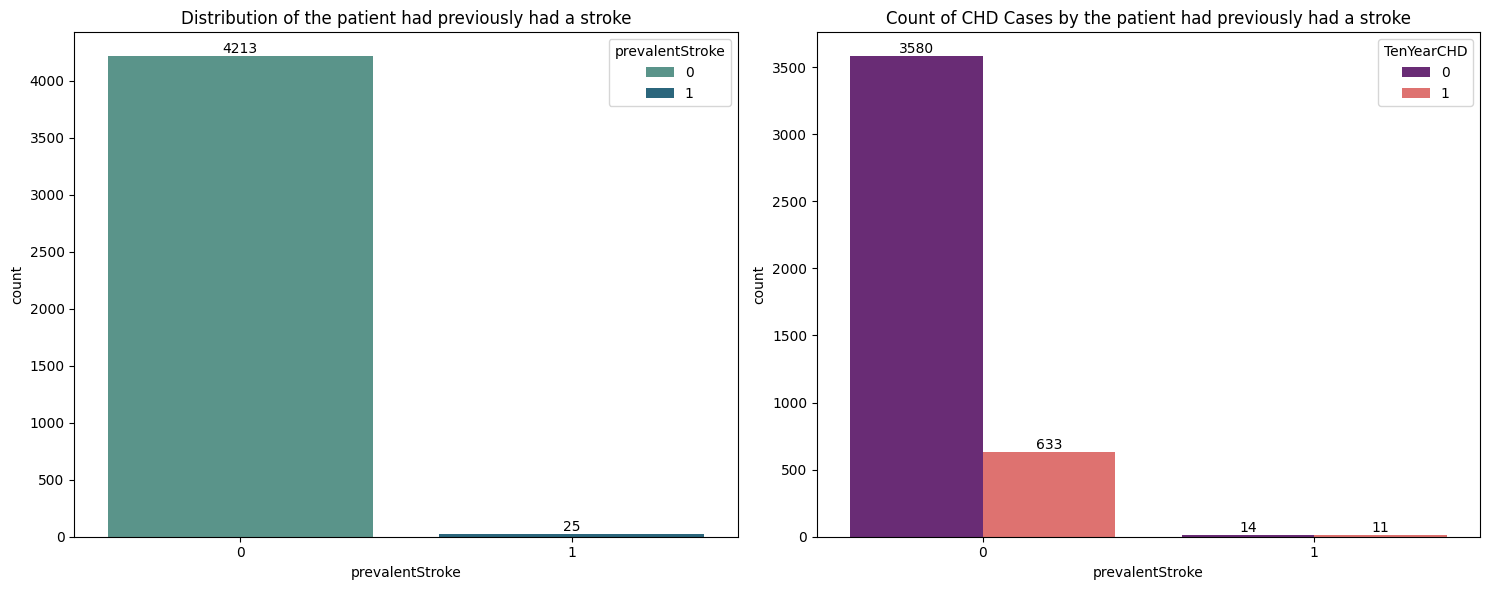

In [77]:
plt.figure(figsize=(15, 6))

# First diagram: Current smoker distribution
ax1 = plt.subplot(1, 2, 1)
# We used hue='prevalentStroke' to avoid the warning, and legend=False because we don't need a key here
sns.countplot(data=df_clean, x='prevalentStroke', hue='prevalentStroke', palette='crest')
plt.title('Distribution of the patient had previously had a stroke')

for container in ax1.containers:
    ax1.bar_label(container)

# Second diagram: Comparing disease incidence by current Smoker
ax2 = plt.subplot(1, 2, 2)
sns.countplot(data=df_clean, x='prevalentStroke', hue='TenYearCHD', palette='magma')
plt.title('Count of CHD Cases by the patient had previously had a stroke')

for container in ax2.containers:
    ax2.bar_label(container)

plt.tight_layout()
plt.show()

#### `prevalentHyp`

Whether the patient was hypertensive (1 = Yes, 0 = No).

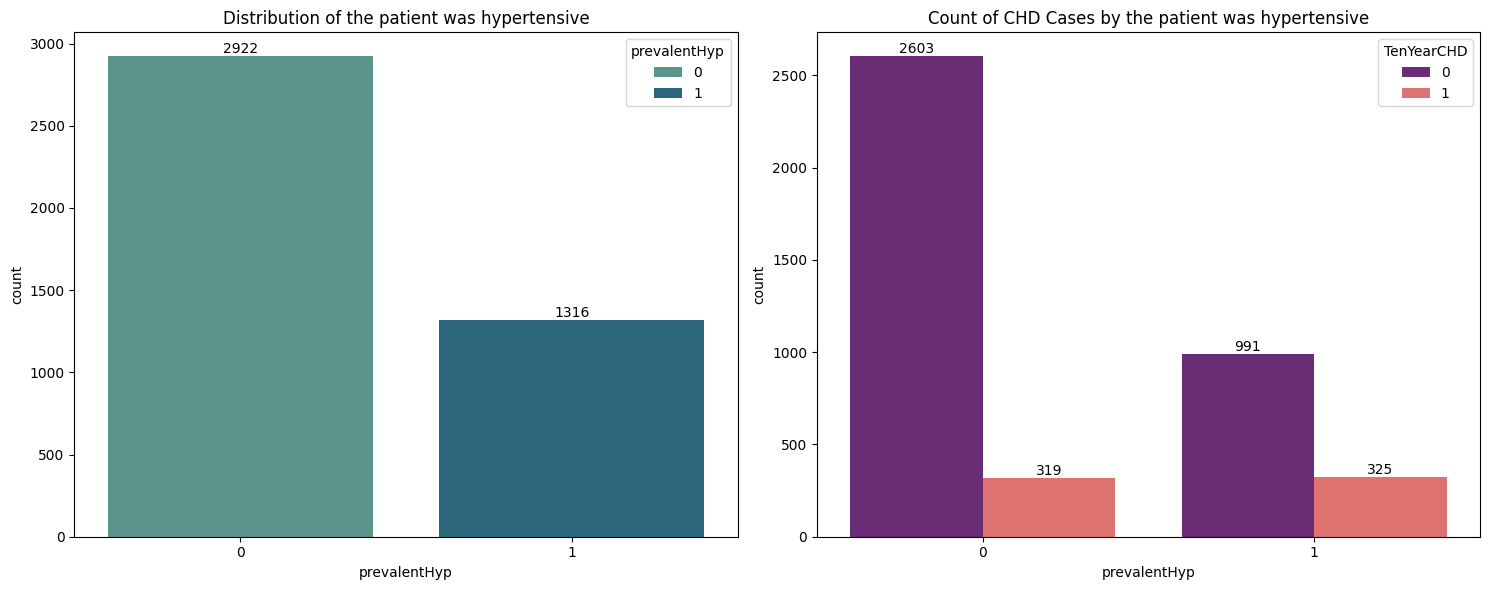

In [78]:
plt.figure(figsize=(15, 6))

# First diagram: Current smoker distribution
ax1 = plt.subplot(1, 2, 1)
# We used hue='prevalentHyp' to avoid the warning, and legend=False because we don't need a key here
sns.countplot(data=df_clean, x='prevalentHyp', hue='prevalentHyp', palette='crest')
plt.title('Distribution of the patient was hypertensive')

for container in ax1.containers:
    ax1.bar_label(container)

# Second diagram: Comparing disease incidence by current Smoker
ax2 = plt.subplot(1, 2, 2)
sns.countplot(data=df_clean, x='prevalentHyp', hue='TenYearCHD', palette='magma')
plt.title('Count of CHD Cases by the patient was hypertensive')

for container in ax2.containers:
    ax2.bar_label(container)

plt.tight_layout()
plt.show()

##### 🔍 Insight:

* **BPMeds & Stroke:** Although the number of people with a history of stroke or taking blood pressure medication in the sample is very small, a significant proportion of them tested positive for CHD, making them **very strong** indicators despite their rarity.

* **Prevalent Hypertension:** People with high blood pressure have a much higher risk of developing heart disease than those with normal blood pressure.

---

#### `diabetes`

Whether the patient had diabetes (1 = Yes, 0 = No).

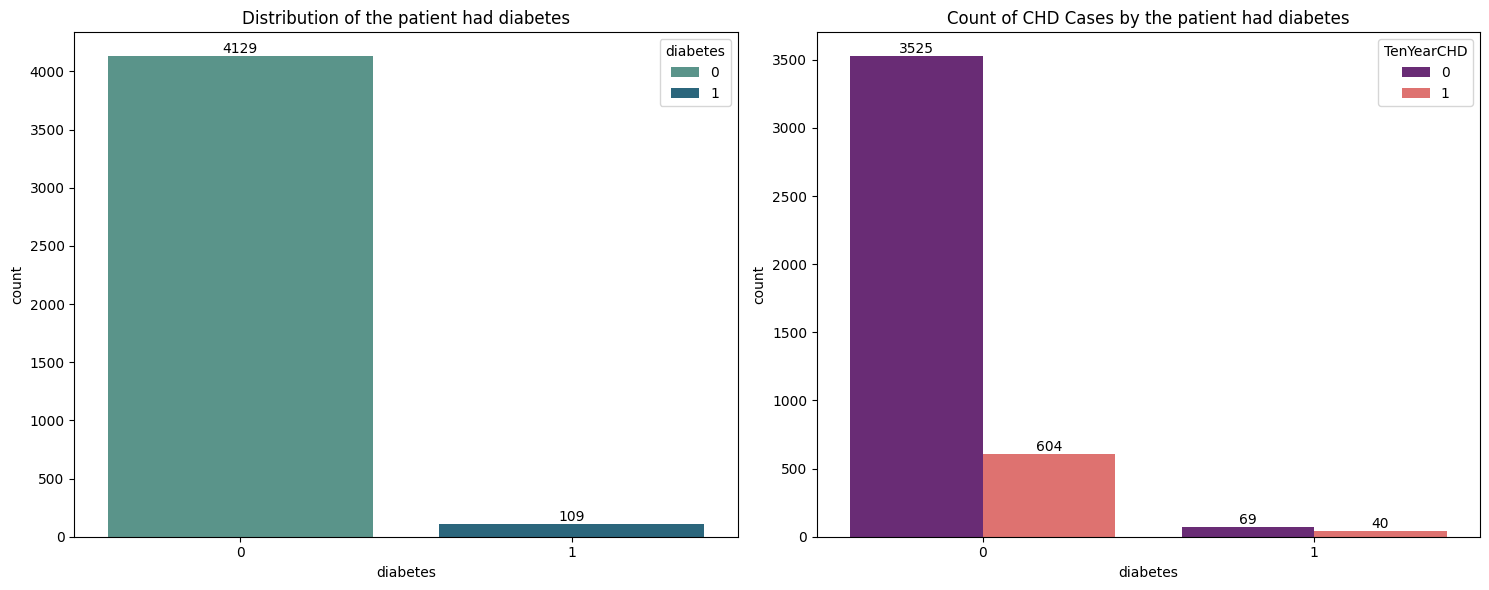

In [79]:
plt.figure(figsize=(15, 6))

# First diagram: the patient had diabetes distribution
ax1 = plt.subplot(1, 2, 1)
# We used hue='diabetes' to avoid the warning, and legend=False because we don't need a key here
sns.countplot(data=df_clean, x='diabetes', hue='diabetes', palette='crest')
plt.title('Distribution of the patient had diabetes')

for container in ax1.containers:
    ax1.bar_label(container)

# Second diagram: Comparing disease incidence by the patient had diabetes
ax2 = plt.subplot(1, 2, 2)
sns.countplot(data=df_clean, x='diabetes', hue='TenYearCHD', palette='magma')
plt.title('Count of CHD Cases by the patient had diabetes')

for container in ax2.containers:
    ax2.bar_label(container)

plt.tight_layout()
plt.show()

#### `glucose`

Blood glucose level.

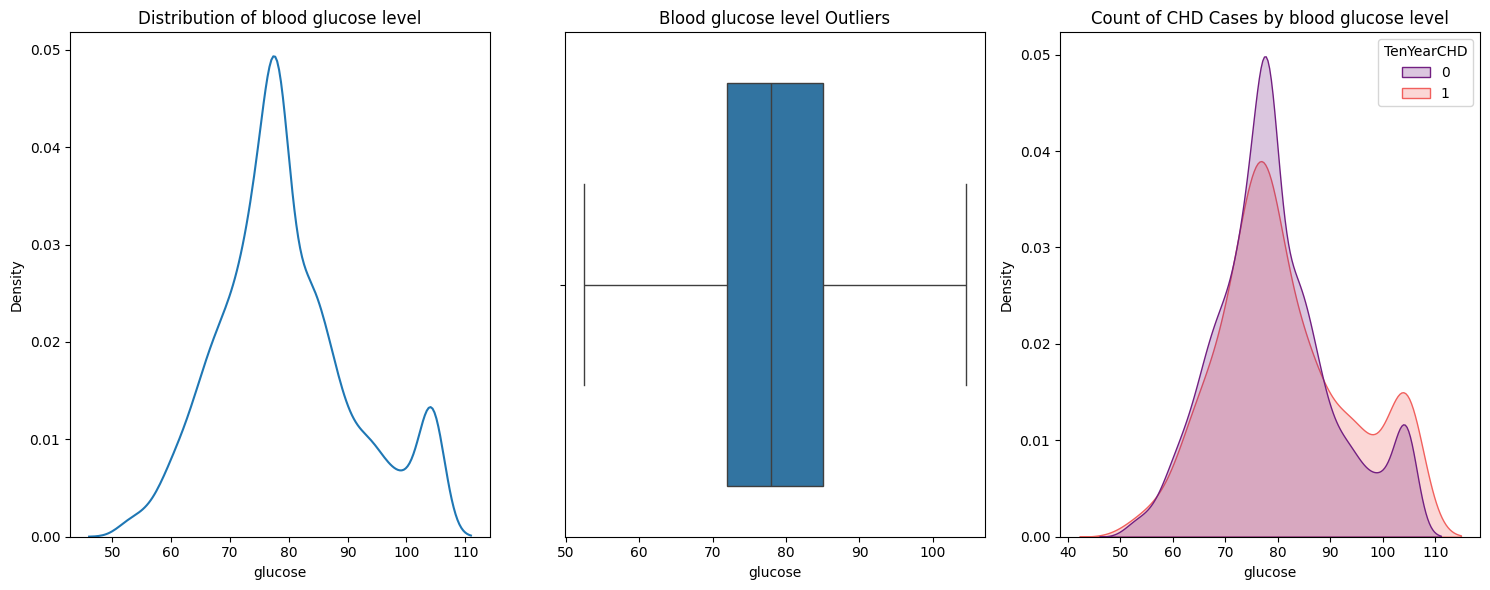

In [80]:
plt.figure(figsize=(15, 6))

# First diagram: Diastolic blood pressure. distribution 
plt.subplot(1, 3, 1)
sns.kdeplot(data=df_clean, x='glucose')
plt.title('Distribution of blood glucose level')

# Second diagram: Comparing disease incidence by blood glucose level.
ax2 = plt.subplot(1, 3, 2)
sns.boxplot(data=df_clean, x='glucose')
plt.title('Blood glucose level Outliers')

# Third diagram: Comparing disease incidence by blood glucose level.
plt.subplot(1, 3, 3)
sns.kdeplot(data=df_clean, x='glucose', hue='TenYearCHD', fill=True, palette='magma', common_norm=False)
plt.title('Count of CHD Cases by blood glucose level')

plt.tight_layout()
plt.show()

##### 🔍 Insight:
* **The "Silent" Killer:** While most patients have normal glucose levels (~70-100), the "tail" of the distribution (extremely high glucose) is almost exclusively populated by CHD-positive cases.
* **Diabetes Factor:** Diabetics in the dataset have a disproportionately high rate of heart disease.

---

#### `totChol`

Total cholesterol level.

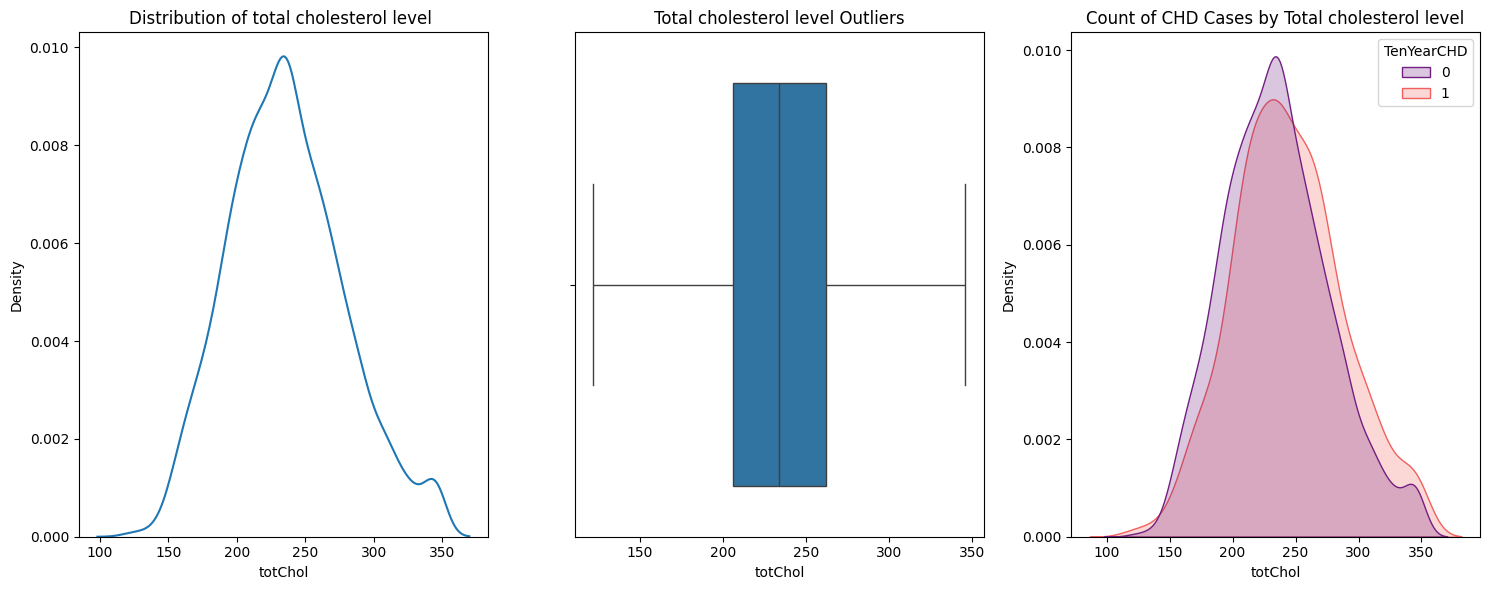

In [81]:
plt.figure(figsize=(15, 6))

# First diagram: Total cholesterol level distribution 
plt.subplot(1, 3, 1)
sns.kdeplot(data=df_clean, x='totChol')
plt.title('Distribution of total cholesterol level ')

# Second diagram: Comparing disease incidence by total cholesterol level
plt.subplot(1, 3, 2)
sns.boxplot(data=df_clean, x='totChol')
plt.title('Total cholesterol level Outliers')

# Third diagram: Comparing disease incidence by total cholesterol level
plt.subplot(1, 3, 3)
sns.kdeplot(data=df_clean, x='totChol', hue='TenYearCHD', fill=True, palette='magma', common_norm=False)
plt.title('Count of CHD Cases by Total cholesterol level')

plt.tight_layout()
plt.show()

#### `BMI`

Body Mass Index ($weight / height^2$).

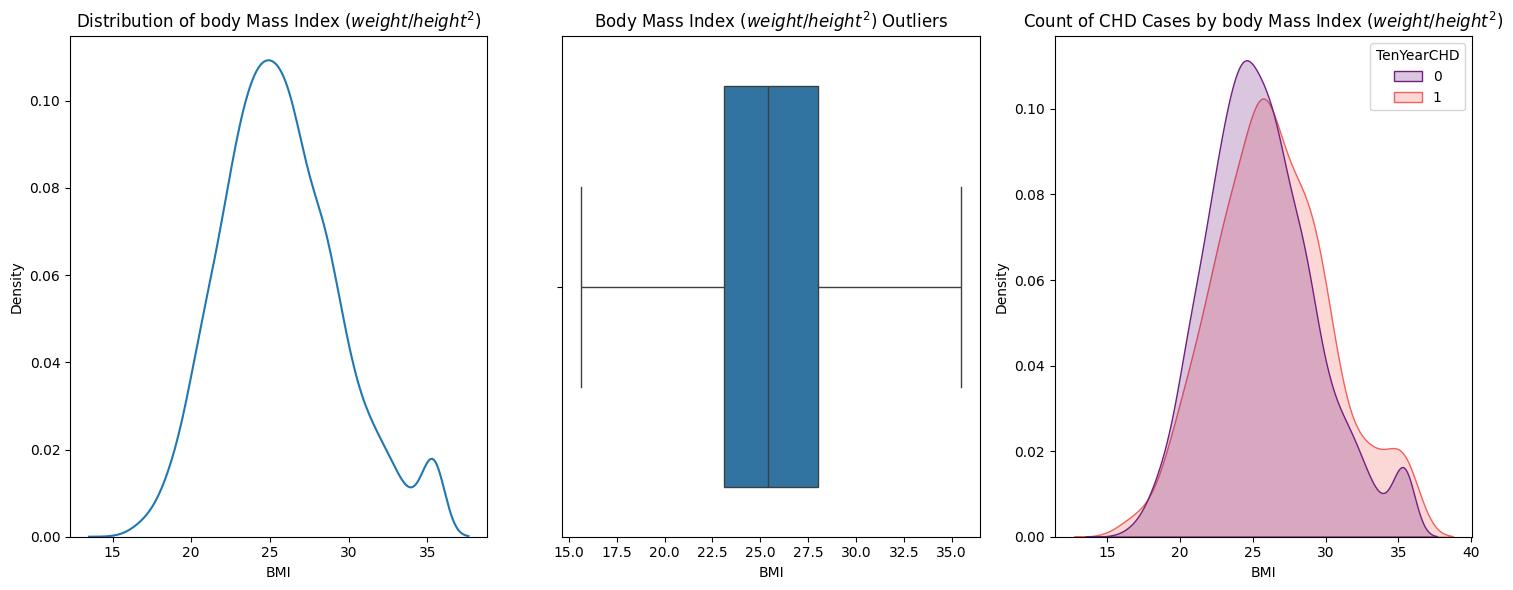

In [82]:
plt.figure(figsize=(15, 6))

# First diagram: Diastolic blood pressure. distribution 
plt.subplot(1, 3, 1)
sns.kdeplot(data=df_clean, x='BMI')
plt.title('Distribution of body Mass Index ($weight / height^2$)')

# Second diagram: Comparing disease incidence by body Mass Index ($weight / height^2$).
ax2 = plt.subplot(1, 3, 2)
sns.boxplot(data=df_clean, x='BMI')
plt.title('Body Mass Index ($weight / height^2$) Outliers')

# Third diagram: Comparing disease incidence by body Mass Index ($weight / height^2$).
plt.subplot(1, 3, 3)
sns.kdeplot(data=df_clean, x='BMI', hue='TenYearCHD', fill=True, palette='magma', common_norm=False)
plt.title('Count of CHD Cases by body Mass Index ($weight / height^2$)')

plt.tight_layout()
plt.show()

##### 🔍 Insight:
* **Metabolic Health:** Both `totChol` and `BMI` show a "right-shift" in their distributions for CHD-positive patients. 
* **Observation:** High cholesterol levels (above 240) and High BMI (Obesity range) are visibly linked to increased 10-year heart disease risk.

---

#### `sysBP`

Systolic blood pressure.

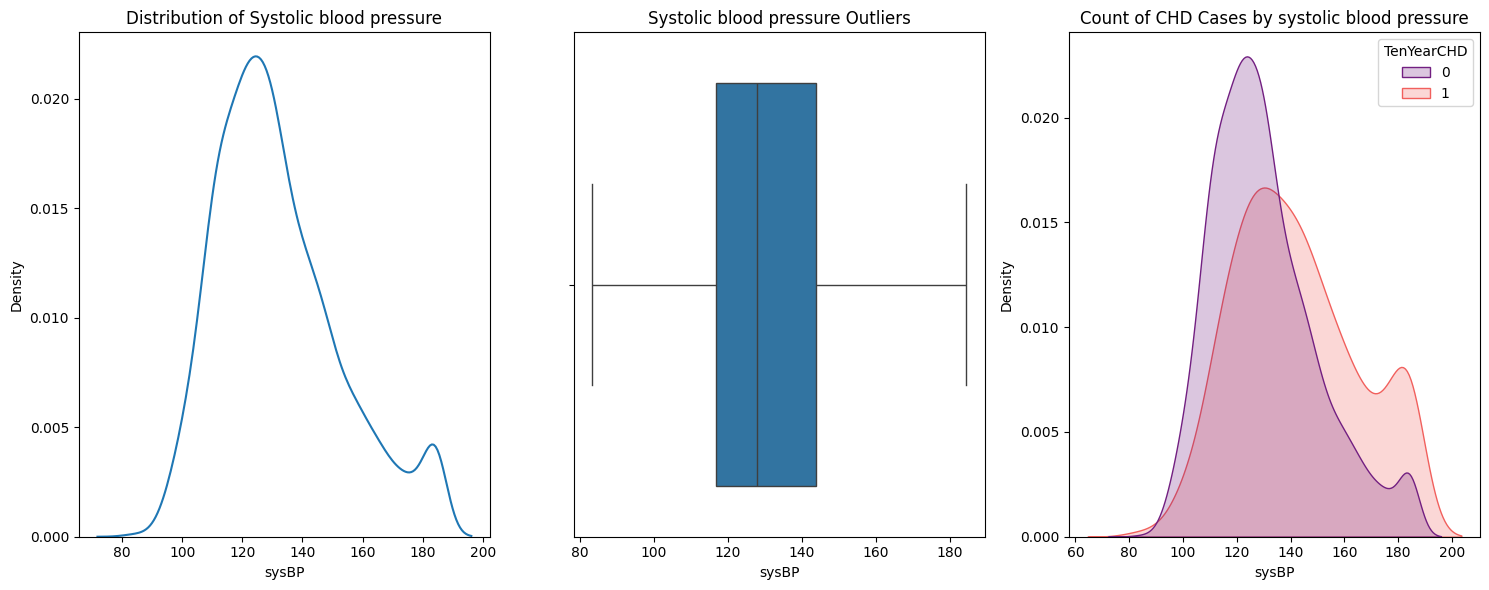

In [83]:
plt.figure(figsize=(15, 6))

# First diagram: Total cholesterol level distribution 
plt.subplot(1, 3, 1)
sns.kdeplot(data=df_clean, x='sysBP')
plt.title('Distribution of Systolic blood pressure')

# Second diagram: Comparing disease incidence by total cholesterol level
plt.subplot(1, 3, 2)
sns.boxplot(data=df_clean, x='sysBP')
plt.title('Systolic blood pressure Outliers')

# Third diagram: Comparing disease incidence by total cholesterol level
plt.subplot(1, 3, 3)
sns.kdeplot(data=df_clean, x='sysBP', hue='TenYearCHD', fill=True, palette='magma', common_norm=False)
plt.title('Count of CHD Cases by systolic blood pressure')

plt.tight_layout()
plt.show()

#### `diaBP`

Diastolic blood pressure.

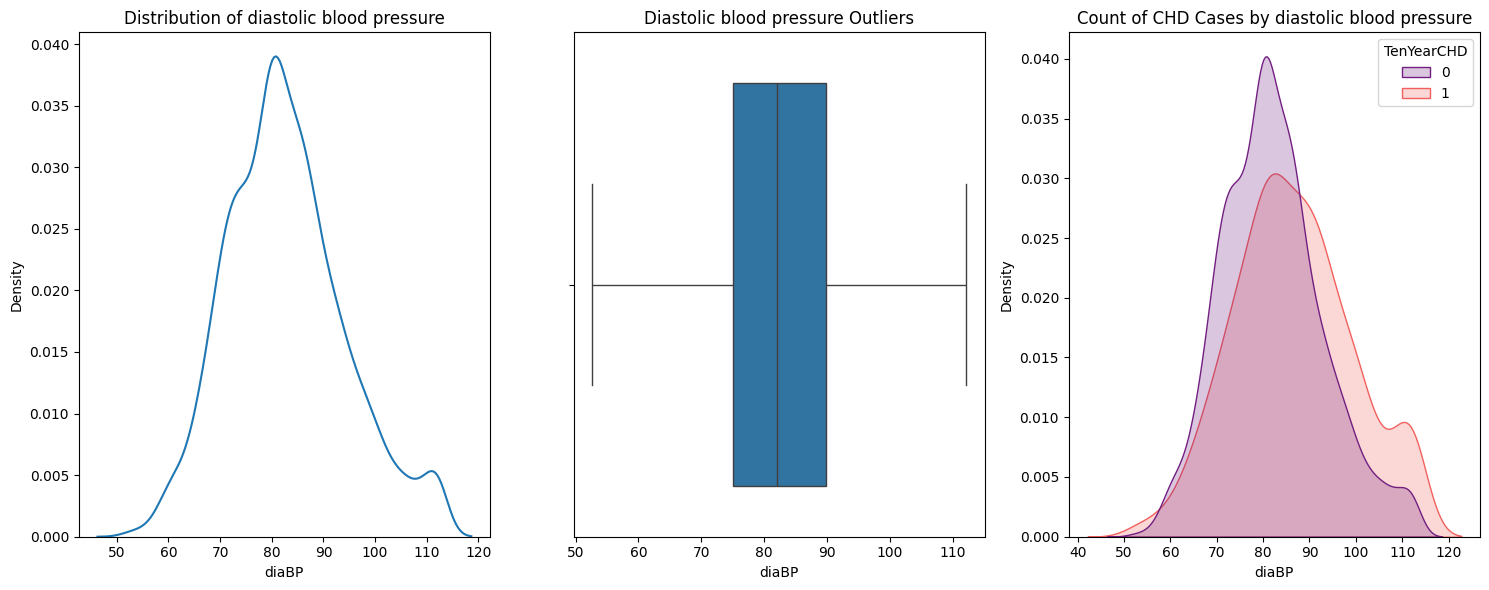

In [84]:
plt.figure(figsize=(15, 6))

# First diagram: Diastolic blood pressure. distribution 
plt.subplot(1, 3, 1)
sns.kdeplot(data=df_clean, x='diaBP')
plt.title('Distribution of diastolic blood pressure')

# Second diagram: Comparing disease incidence by diastolic blood pressure.
plt.subplot(1, 3, 2)
sns.boxplot(data=df_clean, x='diaBP')
plt.title('Diastolic blood pressure Outliers')

# Third diagram: Comparing disease incidence by diastolic blood pressure.
plt.subplot(1, 3, 3)
sns.kdeplot(data=df_clean, x='diaBP', hue='TenYearCHD', fill=True, palette='magma', common_norm=False)
plt.title('Count of CHD Cases by diastolic blood pressure')

plt.tight_layout()
plt.show()

##### 🔍 Insight:
* **Hypertension Impact:** Patients with **Higher Systolic Blood Pressure (sysBP)** show a much stronger shift towards the positive CHD class.
* **Correlation:** The overlap in `diaBP` is slightly more than `sysBP`, making **Systolic BP** a potentially more sensitive predictor for this specific model.

#### `heartRate`

Heart rate (beats per minute).

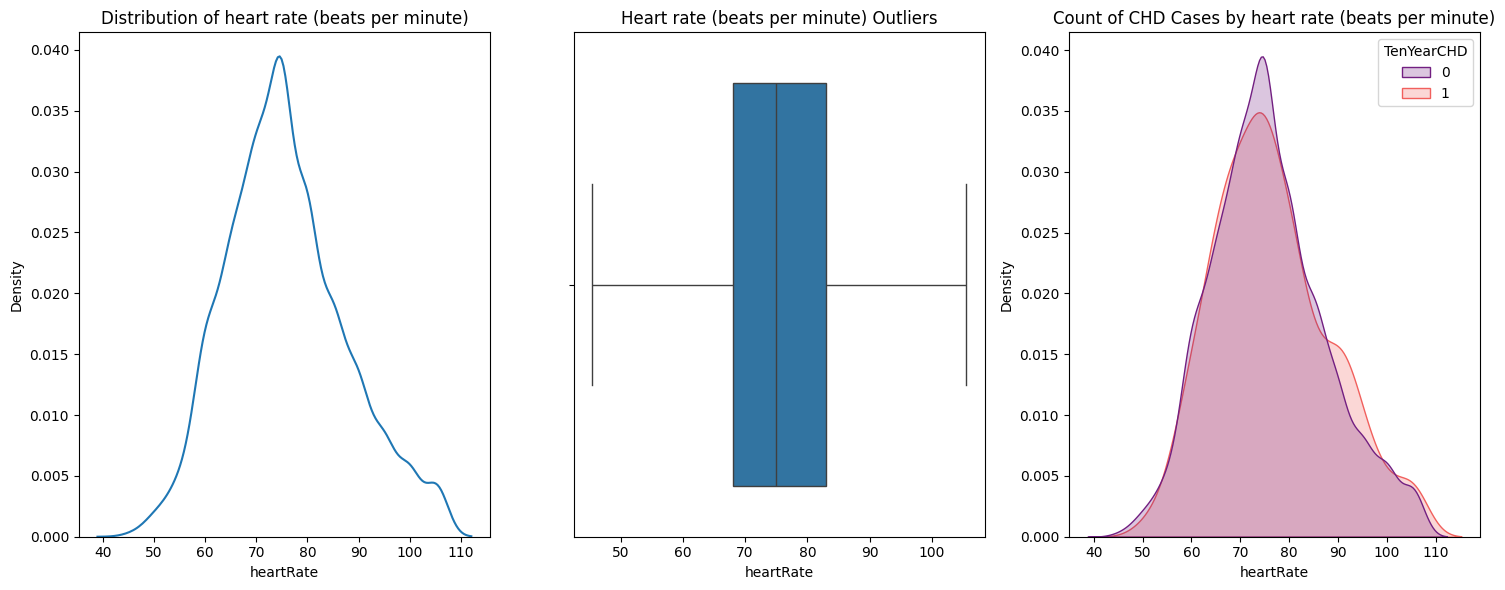

In [85]:
plt.figure(figsize=(15, 6))

# First diagram: Diastolic blood pressure. distribution 
plt.subplot(1, 3, 1)
sns.kdeplot(data=df_clean, x='heartRate')
plt.title('Distribution of heart rate (beats per minute)')

# Second diagram: Comparing disease incidence by heart rate (beats per minute).
ax2 = plt.subplot(1, 3, 2)
sns.boxplot(data=df_clean, x='heartRate')
plt.title('Heart rate (beats per minute) Outliers')

# Third diagram: Comparing disease incidence by heart rate (beats per minute).
plt.subplot(1, 3, 3)
sns.kdeplot(data=df_clean, x='heartRate', hue='TenYearCHD', fill=True, palette='magma', common_norm=False)
plt.title('Count of CHD Cases by heart rate (beats per minute)')

plt.tight_layout()
plt.show()

##### 🔍 Insight:
* **Normal Range:** Most patients have a resting heart rate between **60 and 100 beats per minute**, which is considered the normal physiological range.
* **CHD Relation:** There is a slight overlap between the heart rate distributions of both classes. However, patients with a higher resting heart rate (tachycardia) show a marginally increased presence in the positive CHD group.
* **Observation:** While `heartRate` is an important clinical sign, it shows a weaker direct correlation with 10-year CHD compared to blood pressure or age, suggesting it works better as a supplementary feature rather than a primary predictor.

---

#### `TenYearCHD`

10-year risk of coronary heart disease (Binary: 1 = "Yes", 0 = "No").

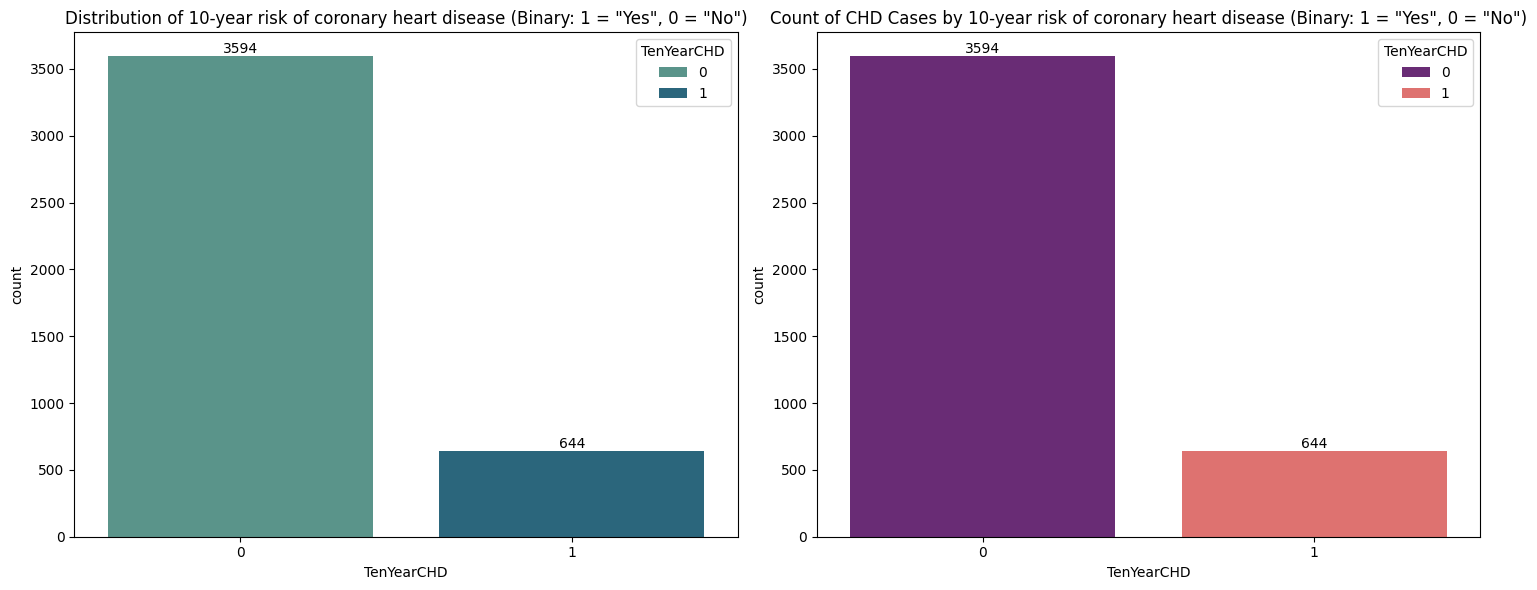

In [86]:
plt.figure(figsize=(15, 6))

# First diagram: Distribution of 10-year risk of coronary heart disease (Binary: 1 = "Yes", 0 = "No")
ax1 = plt.subplot(1, 2, 1)
# We used hue='TenYearCHD' to avoid the warning, and legend=False because we don't need a key here
sns.countplot(data=df_clean, x='TenYearCHD', hue='TenYearCHD', palette='crest')
plt.title('Distribution of 10-year risk of coronary heart disease (Binary: 1 = "Yes", 0 = "No")')

for container in ax1.containers:
    ax1.bar_label(container)

# Second diagram: Comparing disease incidence by 10-year risk of coronary heart disease (Binary: 1 = "Yes", 0 = "No")
ax2 = plt.subplot(1, 2, 2)
sns.countplot(data=df_clean, x='TenYearCHD', hue='TenYearCHD', palette='magma')
plt.title('Count of CHD Cases by 10-year risk of coronary heart disease (Binary: 1 = "Yes", 0 = "No")')

for container in ax2.containers:
    ax2.bar_label(container)

plt.tight_layout()
plt.show()

##### 🔍 Insight:
* **Class Imbalance:** The target variable is heavily imbalanced (~15% Yes / 85% No).
* **Modeling Strategy:** Since we care more about "False Negatives" (not missing a sick person), we must prioritize **Recall** and consider techniques like **SMOTE** or **Class Weights** during the training phase.

---

### Correlation Matrix

<Axes: >

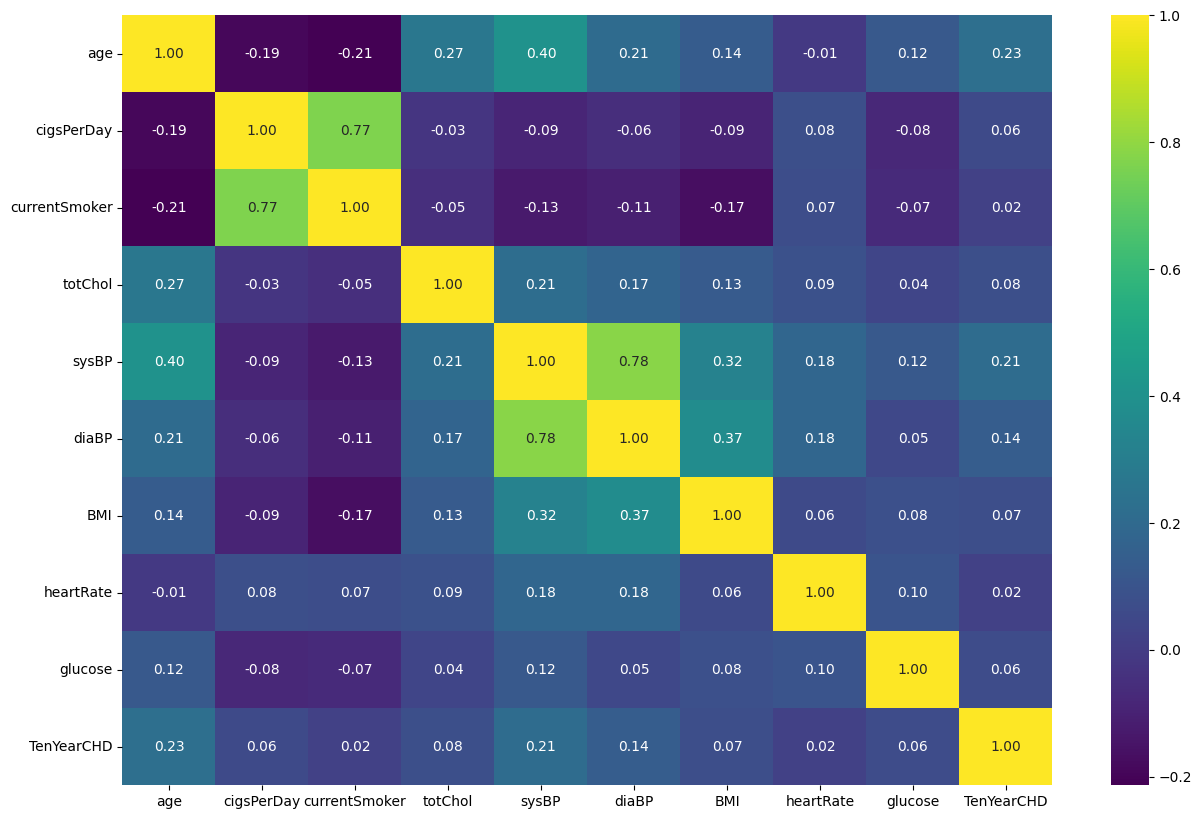

In [87]:
corr_cols = ['age', 'cigsPerDay', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
corr = df_clean[corr_cols].corr()

plt.figure(figsize=(15, 10))

sns.heatmap(data=corr, annot=True, fmt='.2f', cmap='viridis')

##### 🔍 Insights from Correlation Heatmap:

* **Strong Positive Correlation:** * There is a very high correlation between **`sysBP`** and **`diaBP`** (~0.78). This is expected as they both measure blood pressure. 
    * *Tip:* Keeping both might lead to redundancy. For some models, we might consider using only `sysBP` as it shows a slightly higher correlation with the target.
    
* **Target Relationship (TenYearCHD):**
    * **`age`**, **`sysBP`**, and **`prevalentHyp`** show the strongest positive correlation with the 10-year risk of heart disease. This confirms that age and hypertension are the primary drivers of risk in this dataset.
    * **`glucose`** also shows a significant link, reinforcing the importance of metabolic health in heart disease prediction.

* **Weak Correlations:**
    * **`heartRate`** and **`BMI`** have surprisingly weak direct linear correlations with `TenYearCHD`. This suggests their impact might be non-linear or they act as secondary factors when combined with other features like age or blood pressure.

* **Smoking Links:**
    * As expected, **`currentSmoker`** and **`cigsPerDay`** are highly correlated (~0.77). When building the model, `cigsPerDay` might be more informative as it provides a continuous measure of the smoking habit's intensity.

## Feature Engineering

In [88]:
df_clean['age_sysBP'] = df_clean['age'] * df_clean['sysBP']

**Why did we multiply age by blood pressure (`age` * `sysBP`)?**

* **From a medical perspective:** The effect of high blood pressure on the heart isn't the same for everyone. A 60-year-old with high blood pressure has a much higher risk of heart disease (CHD) than a 20-year-old with the same blood pressure level.
When we multiply them together, we're telling the model: "Be aware that the effect of blood pressure becomes more dangerous and stronger with increasing age." This is called the Interaction Effect.

* **From a technical perspective:** Logistic regression assumes that each factor acts independently (additively). If age increases by 1, the risk increases by a fixed percentage, and if blood pressure increases by 1, the risk increases by a fixed percentage. Multiplying them together allows the model to understand that these factors "reinforce" and amplify each other's effects.

In [89]:
df_clean['pulse_pressure'] = df_clean['sysBP'] - df_clean['diaBP']

**Pulse Pressure:** This is a very strong medical indicator, representing the difference between systolic and diastolic blood pressure

In [90]:
df_clean['age^2'] = df_clean['age'] ** 2

**Why did we square age (age^2)?**
* **From a medical perspective:** The risk of heart disease doesn't increase "steadily" with age (meaning the risk doesn't increase by a constant 1% for every year you get older). In fact, the risk increases rapidly (accelerated) as we get older; the difference in risk between someone aged 30 and 40 is "small," but the difference between someone aged 50 and 60 is "very large."

**`age^2` represents this acceleration.**

* **From a technical perspective:** Logistic regression draws a "straight line" to separate the affected from the healthy. However, the relationship between age and disease is usually a "curve."
When we square age, we transform this straight line into a parabola (curve), which allows the model to describe the medical reality much more accurately.

## Build Machine Learning Model

### Split the dataset into x & y

In [91]:
x = df_clean.drop(columns=['TenYearCHD', 'currentSmoker', 'diaBP'], axis=1)
y = df_clean['TenYearCHD']

### Split into **train** and **test** sets

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42, stratify=y)

Check the shape of x_train, x_test, y_train, y_test

In [93]:
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (3390, 16)
Shape of y_train: (3390,)
Shape of x_test: (848, 16)
Shape of y_test: (848,)


### Applying Feature Scaling

In [94]:
cols_to_scale = ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose', 'age_sysBP', 'pulse_pressure', 'age^2']

# Initialize RobustScaler
robust_scale = RobustScaler()

# Fit the scaler on x_train and transform both x_train and x_test
x_train[cols_to_scale] = robust_scale.fit_transform(x_train[cols_to_scale])
x_test[cols_to_scale] = robust_scale.transform(x_test[cols_to_scale])

### Overcome the Imbalance data

In [95]:
over_smote = SMOTE(sampling_strategy=0.6, random_state=42)

x_train_smote, y_train_smote = over_smote.fit_resample(x_train, y_train)

print(f'Before SMOTE:\n {pd.Series(y_train).value_counts()}')
print(f'After SMOTE:\n {pd.Series(y_train_smote).value_counts()}')

Before SMOTE:
 TenYearCHD
0    2875
1     515
Name: count, dtype: int64
After SMOTE:
 TenYearCHD
0    2875
1    1725
Name: count, dtype: int64


### Logistic Regression Model

#### Training the model

In [96]:
model_logr = LogisticRegression(random_state=42)

param_grid = {  
    'C': [0.01, 0.1, 1, 10],
    'solver': ['saga'],             
    'l1_ratio': [0, 0.5, 1],     
    'max_iter': [10000],           
    'class_weight': [None, 'balanced']
}

In [97]:
grid_search = GridSearchCV(model_logr, param_grid, scoring='f1')
grid_search.fit(x_train_smote, y_train_smote)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Best hyperparameters: {'C': 10, 'class_weight': 'balanced', 'l1_ratio': 1, 'max_iter': 10000, 'solver': 'saga'}
Best score: 0.6018677604903097


Variable of model

In [98]:
best_model = grid_search.best_estimator_

#### Evaluate the Test set

In [103]:
# y_pred = best_model.predict(x_test)

y_probs = best_model.predict_proba(x_test)[:, 1]
y_probs_costum = (y_probs >= 0.35).astype(int)

accuracy = accuracy_score(y_test, y_probs_costum)
precision = precision_score(y_test, y_probs_costum)
recall = recall_score(y_test, y_probs_costum)
f1 = f1_score(y_test, y_probs_costum)

# Print evaluate of Test set
print("============ Evaluate of Test set ============")
print(f'The Accuracy: {accuracy:.2f}')
print(f'The Precision: {precision:.2f}')
print(f'The Recall: {recall:.2f}')
print(f'The F1 Score: {f1:.2f}')

============ Evaluate of Test set ============
The Accuracy: 0.49
The Precision: 0.21
The Recall: 0.87
The F1 Score: 0.34


#### Confusion Matrix

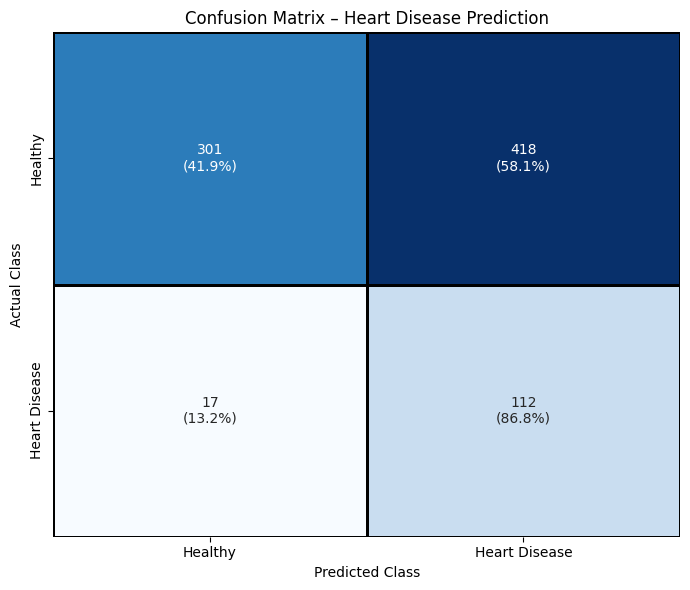

In [ ]:
conf_matrix = confusion_matrix(y_test, y_probs_costum)


class_names = ["Healthy", "Heart Disease"]

cm_percent = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

labels = np.array([
    [f"{conf_matrix[i, j]}\n({cm_percent[i, j]*100:.1f}%)" for j in range(conf_matrix.shape[1])]
    for i in range(conf_matrix.shape[0])
])


plt.figure(figsize=(7, 6))
sns.heatmap(
    conf_matrix,
    annot=labels,
    fmt="",
    cmap="Blues",
    cbar=False,
    xticklabels=class_names,
    yticklabels=class_names,
    linewidths=1,
    linecolor="black"
)

plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix - Heart Disease Prediction")
plt.tight_layout()
plt.show()


#### Draw The ROC-AUC Curve

The ROC-AUC Score: 0.68



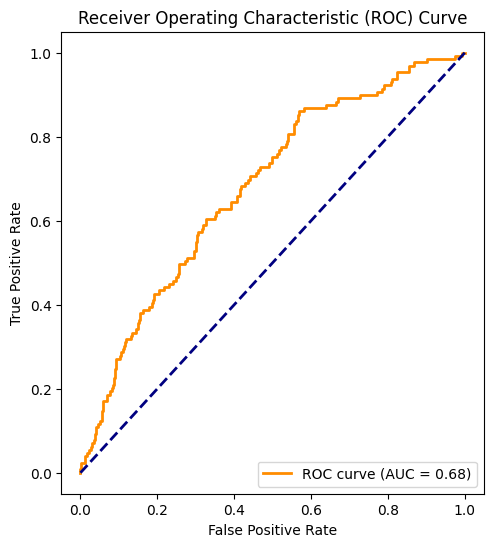

In [105]:
roc_auc = roc_auc_score(y_test, y_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

print(f'The ROC-AUC Score: {roc_auc:.2f}\n')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

---

# 📊 Final Model Evaluation & Clinical Interpretation

### 🩺 Final Numerical Results (Test Set Metrics)

After adjusting the threshold (Threshold = 0.35) to align with the clinical objectives, the results were as follows:

| Metric | Value | Analytical Interpretation |
|--------|-------|---------------------------|
| Accuracy | 49% | Overall accuracy (affected by prioritizing safety over overall statistics). |
| Recall (Sensitivity) | 87% | Primary Objective: 87% of patients with actual heart disease were identified. |
| Precision | 21% | This means that out of every 100 people classified as "high-risk," 21 are actually ill. |
| **ROC-AUC Score** | **0.68** | The model's intrinsic ability to distinguish between sick and healthy individuals. |


---

### 🔍 Model Executive Summary

#### 1. Why was the threshold lowered to 0.35?

In predicting serious illnesses, the most dangerous error is a Type II error (**False Negative**) – which is telling a patient they are healthy. Therefore, the threshold was lowered to increase sensitivity.

* **Result:** Reducing the number of potentially catastrophic missed cases to only 17 out of 129.

#### 2. The Accuracy-Safety Trade-off

The accuracy drop to 49% is not a model failure, but rather a strategic decision. The model now acts as a highly sensitive alarm system; it prefers to suspect a healthy individual (thus requiring further testing) rather than leave even one patient untreated.

#### 3. Feature Engineering Effectiveness

Using advanced techniques such as pulse pressure and age² helped the simple Logistic Regression model simulate complex relationships in the data, maintaining a stable and competitive ROC-AUC value (0.68) despite the complexity and high degree of data interference.

### 🏁 Conclusion

This model represents an ideal **primary screening tool**. Rather than relying on misleading overall accuracy, the model offers genuine protection by detecting **the majority of infected cases (87%)**, which is perfectly aligned with the global medical recommendations of the original **Framingham** study that advise prioritizing "medical caution" over "pure statistical accuracy".

---